In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [2]:
types = {
    "audio_feats_mode":int,
    "audio_feats_time_signature":int,
    "audio_feats_key":int,
    "audio_feats_danceability":float,
    "audio_feats_energy":float,
    "audio_feats_loudness":float,
    "audio_feats_speechiness":float,
    "audio_feats_acousticness":float,
    "audio_feats_instrumentalness":float,
    "audio_feats_liveness":float,
    "audio_feats_valence":float,
    "audio_feats_tempo":float,
    "audio_feats_duration_ms":float
}

In [3]:
df = pd.read_csv("data.csv", dtype=types, header=None).dropna(how="any")
df.columns = ['ID', 'artist_name', 'track_name', 'audio_feats_danceability',
       'audio_feats_energy', 'audio_feats_key', 'audio_feats_loudness',
       'audio_feats_mode', 'audio_feats_speechiness',
       'audio_feats_acousticness', 'audio_feats_instrumentalness',
       'audio_feats_liveness', 'audio_feats_valence', 'audio_feats_tempo',
       'audio_feats_duration_ms', 'audio_feats_time_signature']

In [4]:
df.head(10)

,ID,artist_name,track_name,audio_feats_danceability,audio_feats_energy,audio_feats_key,audio_feats_loudness,audio_feats_mode,audio_feats_speechiness,audio_feats_acousticness,audio_feats_instrumentalness,audio_feats_liveness,audio_feats_valence,audio_feats_tempo,audio_feats_duration_ms,audio_feats_time_signature
0,0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4.0,-7.105,0.0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,226864.0,4.0
1,6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,Toxic,0.774,0.838,5.0,-3.914,0.0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,198800.0,4.0
2,0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,Crazy In Love,0.664,0.759,2.0,-6.583,0.0,0.2090,0.00238,0.000000,0.0598,0.701,99.252,235933.0,4.0
3,1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,Rock Your Body,0.892,0.714,4.0,-6.055,0.0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,267267.0,4.0
4,1lzr43nnXAijIGYnCT8M8H,Shaggy,It Wasn't Me,0.853,0.606,0.0,-4.596,1.0,0.0713,0.05610,0.000000,0.3130,0.654,94.759,227600.0,4.0
5,0XUfyU2QviPAs6bxSpXYG4,Usher,Yeah!,0.881,0.788,2.0,-4.669,1.0,0.1680,0.02120,0.000000,0.0377,0.592,104.997,250373.0,4.0
6,68vgtRHr7iZHpzGpon6Jlo,Usher,My Boo,0.662,0.507,5.0,-8.238,1.0,0.1180,0.25700,0.000000,0.0465,0.676,86.412,223440.0,4.0
7,3BxWKCI06eQ5Od8TY2JBeA,The Pussycat Dolls,Buttons,0.569,0.821,2.0,-4.380,1.0,0.2670,0.17800,0.000000,0.2890,0.408,210.857,225560.0,4.0
8,7H6ev70Weq6DdpZyyTmUXk,Destiny's Child,Say My Name,0.713,0.678,5.0,-3.525,0.0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,271333.0,4.0
9,2PpruBYCo4H7WOBJ7Q2EwM,OutKast,Hey Ya! - Radio Mix / Club Mix,0.727,0.974,4.0,-2.261,0.0,0.0664,0.10300,0.000532,0.1740,0.965,79.526,235213.0,4.0


In [5]:
continuous_data = df.drop(columns=["ID", "artist_name", "track_name", "audio_feats_key", "audio_feats_mode", "audio_feats_time_signature"])
continuous_data

,audio_feats_danceability,audio_feats_energy,audio_feats_loudness,audio_feats_speechiness,audio_feats_acousticness,audio_feats_instrumentalness,audio_feats_liveness,audio_feats_valence,audio_feats_tempo,audio_feats_duration_ms
0,0.904,0.813,-7.105,0.1210,0.031100,0.006970,0.0471,0.8100,125.461,226864.0
1,0.774,0.838,-3.914,0.1140,0.024900,0.025000,0.2420,0.9240,143.040,198800.0
2,0.664,0.759,-6.583,0.2090,0.002380,0.000000,0.0598,0.7010,99.252,235933.0
3,0.892,0.714,-6.055,0.1410,0.201000,0.000234,0.0521,0.8170,100.972,267267.0
4,0.853,0.606,-4.596,0.0713,0.056100,0.000000,0.3130,0.6540,94.759,227600.0
...,...,...,...,...,...,...,...,...,...,...
1236804,0.372,0.702,-10.313,0.1540,0.554000,0.000000,0.8240,0.3300,87.958,87573.0
1236805,0.519,0.869,-5.960,0.0306,0.003410,0.048200,0.3970,0.4650,112.201,195347.0
1236806,0.526,0.927,-4.909,0.0541,0.000061,0.831000,0.4460,0.1760,93.004,156129.0
1236807,0.474,0.885,-5.470,0.0365,0.000010,0.768000,0.1010,0.0737,129.998,325385.0


In [6]:
scaler = StandardScaler()
scaled_feats = scaler.fit_transform(continuous_data)

pca = PCA(n_components=3)
pca_feats = pca.fit_transform(scaled_feats)

pca_feats

array([[-2.14627708, -1.3431583 , -0.87489951],
       [-2.59340859, -0.6997279 , -0.29681809],
       [-1.56029376, -0.87173419,  0.02297029],
       ...,
       [-0.48418337,  1.60222146,  0.35416957],
       [-0.13306042,  2.19953769, -1.15433619],
       [ 0.41840525,  1.14756796, -0.98397408]])

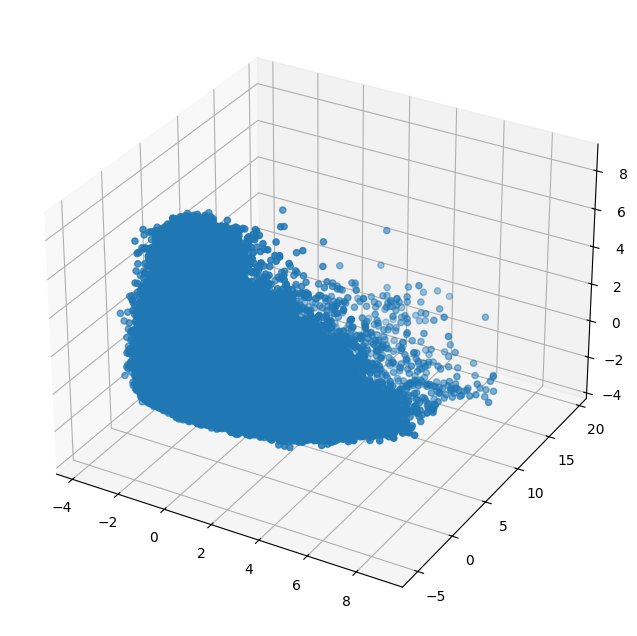

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_feats[:, 0], pca_feats[:, 1], pca_feats[:, 2])
plt.show()

In [14]:
k_mean = KMeans(n_clusters=50)
clustered_data = k_mean.fit_transform(pca_feats)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
labels = k_mean.labels_
labels.shape

(1236745,)

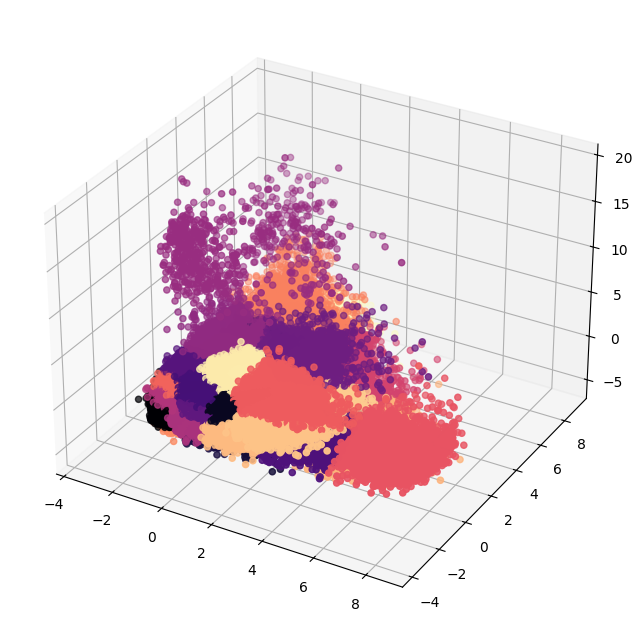

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_feats[:, 2], pca_feats[:, 0],pca_feats[:, 1], c=labels, cmap="magma")
plt.show()

---

# Find optimal k

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

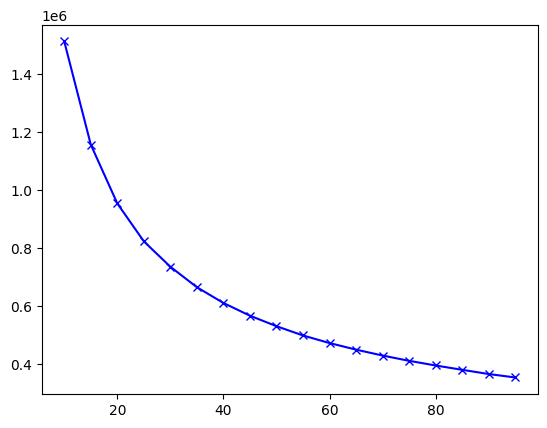

In [17]:
dists = []
K_range = range(10, 100, 5)
for n in K_range:
    kmeans = KMeans(n_clusters=n).fit(pca_feats)
    dists.append(kmeans.inertia_)

plt.plot(K_range, dists, "bx-")
plt.show()

=> k = 50